In [547]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')



In [548]:
df = pd.read_csv("/home/nibba/Documents/usth/machine_learning2/FinalProject/Final-ML2/Supplement_Sales_Weekly_Expanded.csv")

In [549]:
df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


In [550]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 342.6+ KB


In [551]:
df.isnull().sum()

Date              0
Product Name      0
Category          0
Units Sold        0
Price             0
Revenue           0
Discount          0
Units Returned    0
Location          0
Platform          0
dtype: int64

In [552]:
df["Date"]= pd.to_datetime(df["Date"])
df["Date"]

0      2020-01-06
1      2020-01-06
2      2020-01-06
3      2020-01-06
4      2020-01-06
          ...    
4379   2025-03-31
4380   2025-03-31
4381   2025-03-31
4382   2025-03-31
4383   2025-03-31
Name: Date, Length: 4384, dtype: datetime64[ns]

In [553]:
df["Date"].head(30)

0    2020-01-06
1    2020-01-06
2    2020-01-06
3    2020-01-06
4    2020-01-06
5    2020-01-06
6    2020-01-06
7    2020-01-06
8    2020-01-06
9    2020-01-06
10   2020-01-06
11   2020-01-06
12   2020-01-06
13   2020-01-06
14   2020-01-06
15   2020-01-06
16   2020-01-13
17   2020-01-13
18   2020-01-13
19   2020-01-13
20   2020-01-13
21   2020-01-13
22   2020-01-13
23   2020-01-13
24   2020-01-13
25   2020-01-13
26   2020-01-13
27   2020-01-13
28   2020-01-13
29   2020-01-13
Name: Date, dtype: datetime64[ns]

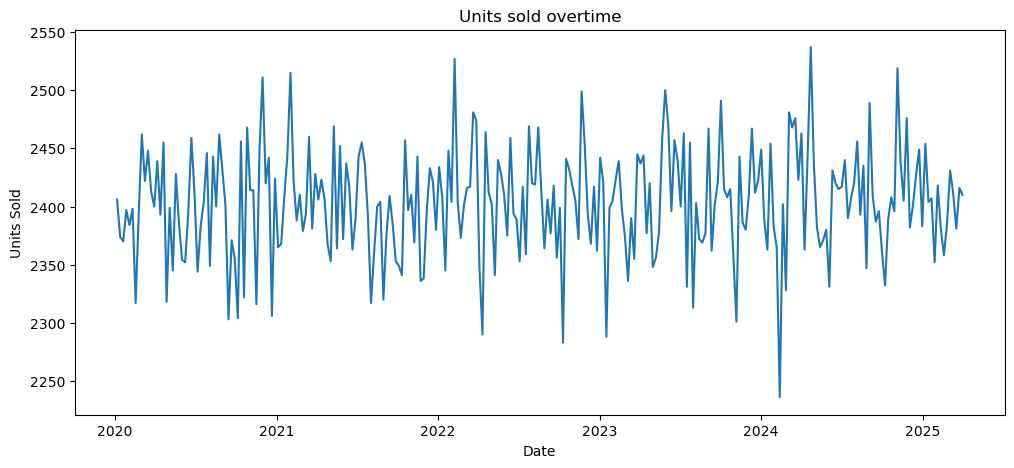

There is no obvious upward or downward trend.
 Units sold remain within a similar range (approximately 2250 to 2550) from 2020 to 2025 in USA,UK and Canadas


In [554]:
plt.figure(figsize=(12,5))
df_sum = df.groupby("Date")["Units Sold"].sum().reset_index()
sns.lineplot(x="Date", y="Units Sold", data = df_sum)
plt.title("Units sold overtime")
plt.show()
print("There is no obvious upward or downward trend.\n Units sold remain within a similar range (approximately 2250 to 2550) from 2020 to 2025 in USA,UK and Canadas")

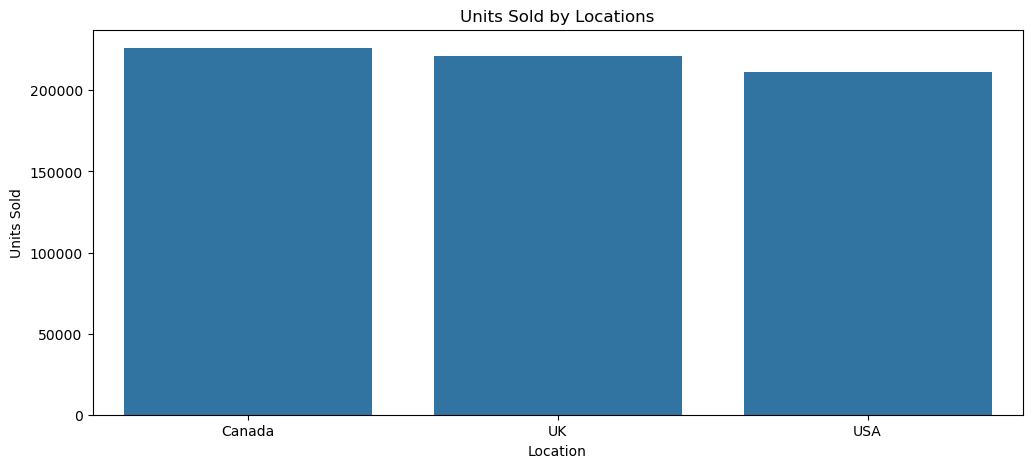

Fall in around 25,000


In [555]:
df_location = df.groupby("Location")["Units Sold"].sum().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(x="Location", y="Units Sold", data = df_location)
plt.title("Units Sold by Locations")
plt.show()

print("Fall in around 25,000")

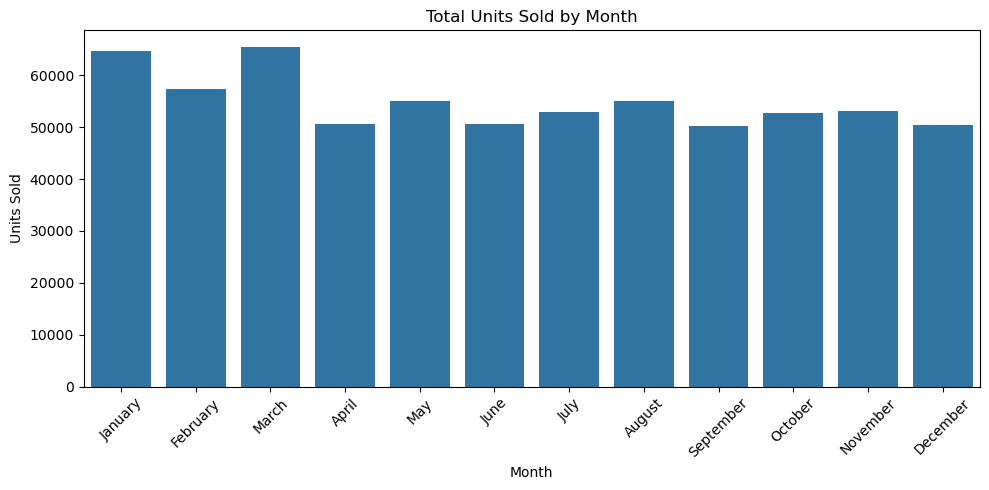

January and March have the highest units sold, both exceeding 60,000
Others fall in range (50,000,55,000)
Show that it has the consistent customers or demands throughout years


In [556]:
df_year = df.copy()
df_year["Month"]=df_year["Date"].dt.month_name()
monthly_sales = df_year.groupby("Month")["Units Sold"].sum().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales['Month'] = pd.Categorical(monthly_sales['Month'], categories=month_order, ordered=True)
monthly_sales = monthly_sales.sort_values("Month")
plt.figure(figsize=(10, 5))
sns.barplot(x="Month", y="Units Sold", data = monthly_sales)
plt.title("Total Units Sold by Month")
plt.ylabel("Units Sold")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


print("January and March have the highest units sold, both exceeding 60,000")
print("Others fall in range (50,000,55,000)")
print("Show that it has the consistent customers or demands throughout years")

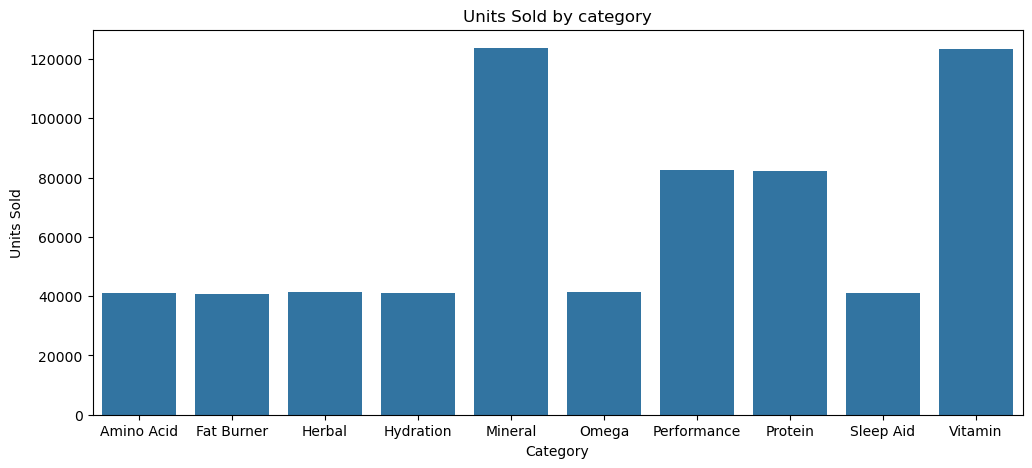

Top-Selling Categories: Mineral and Vitamin categories are clearly the top 
 performers, with units sold exceeding 120,000 for both.
Good-Selling Categories: Performance and Protein also show strong sales, both
 at around 80,000 units


In [557]:
df_sum = df.groupby("Category")["Units Sold"].sum().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(x="Category", y="Units Sold", data = df_sum)
plt.title("Units Sold by category")
plt.show()
print("Top-Selling Categories: Mineral and Vitamin categories are clearly the top \n performers, with units sold exceeding 120,000 for both.")
print("Good-Selling Categories: Performance and Protein also show strong sales, both\n at around 80,000 units")

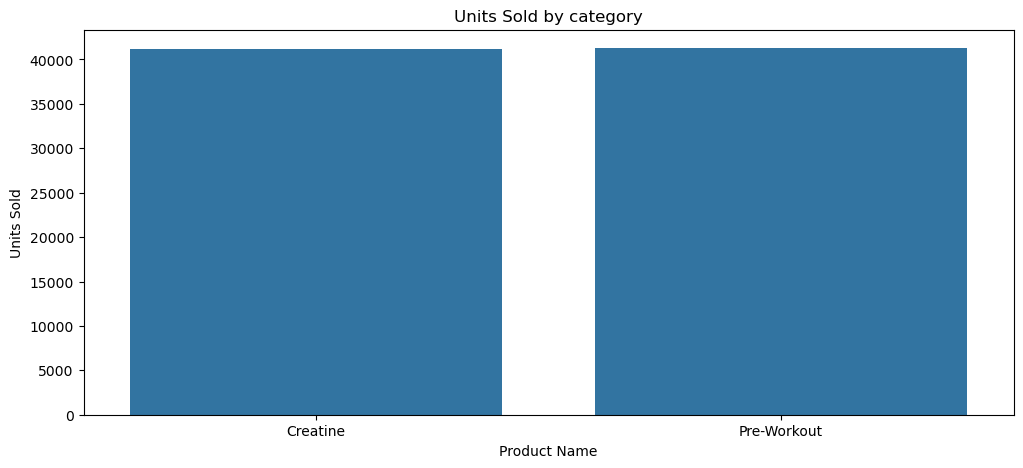

In [558]:
df_cat = df[df["Category"]=="Performance"]
df_cat["Product Name"].value_counts()
df_sum = df_cat.groupby("Product Name")["Units Sold"].sum().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(x="Product Name", y="Units Sold", data = df_sum)
plt.title("Units Sold by category")
plt.show()
# tất cả các product trong bất kỳ một cái category nào cũng đều có chung số lượng bán được

In [559]:
df_top10 = df.groupby("Product Name")['Units Sold'].sum().nlargest(10)
print("Top 10 best-selling products: ")
df_top10

Top 10 best-selling products: 


Product Name
Biotin             41533
Ashwagandha        41408
Fish Oil           41325
Pre-Workout        41287
Magnesium          41270
Whey Protein       41264
Creatine           41236
Zinc               41204
Iron Supplement    41194
Multivitamin       41174
Name: Units Sold, dtype: int64

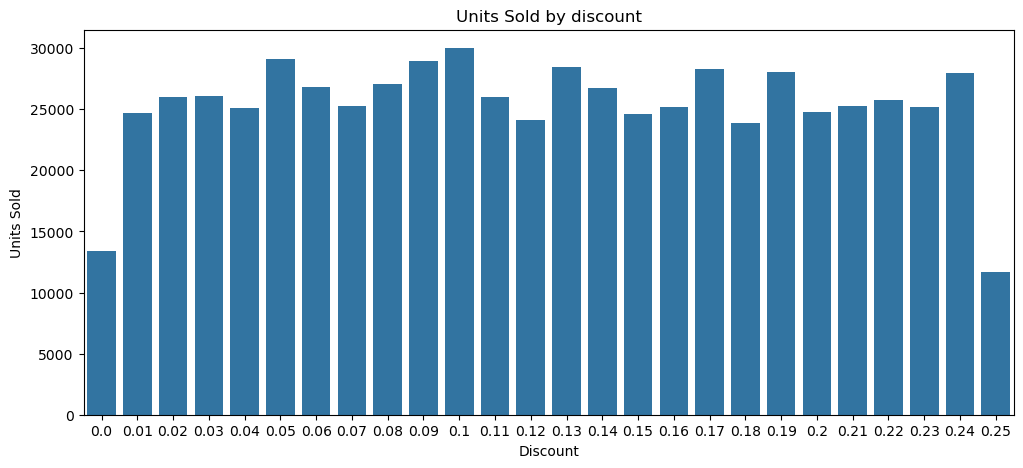

It show that no discount or a very high discount might not
be as effective in selling as moderate discounts


In [560]:
df_percentage = df.groupby("Discount")["Units Sold"].sum().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(x="Discount",y="Units Sold",data=df_percentage)
plt.title("Units Sold by discount")
plt.show()
print("It show that no discount or a very high discount might not\nbe as effective in selling as moderate discounts")

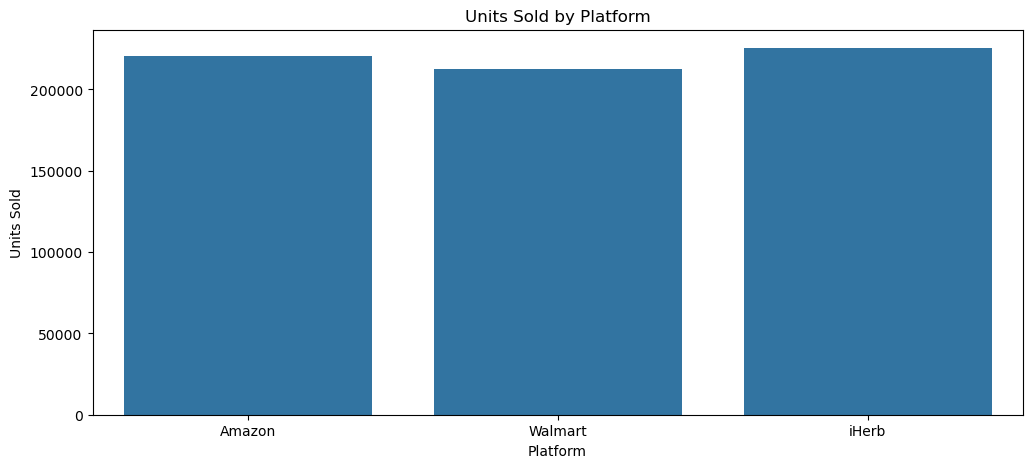

Remain the same in three different platforms


In [561]:
df_platform = df.groupby("Platform")["Units Sold"].sum().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(x="Platform",y="Units Sold", data=df_platform)
plt.title("Units Sold by Platform")
plt.show()
print("Remain the same in three different platforms")

PREPROCESSING

In [562]:
df['Category'].value_counts()##no outlier found


Category
Vitamin        822
Mineral        822
Protein        548
Performance    548
Omega          274
Amino Acid     274
Herbal         274
Sleep Aid      274
Fat Burner     274
Hydration      274
Name: count, dtype: int64

In [563]:
df['Product Name'].value_counts()##no outlier found

Product Name
Whey Protein          274
Vitamin C             274
Fish Oil              274
Multivitamin          274
Pre-Workout           274
BCAA                  274
Creatine              274
Zinc                  274
Collagen Peptides     274
Magnesium             274
Ashwagandha           274
Melatonin             274
Biotin                274
Green Tea Extract     274
Iron Supplement       274
Electrolyte Powder    274
Name: count, dtype: int64

In [564]:
df["Location"].value_counts()##no outlier found

Location
Canada    1507
UK        1475
USA       1402
Name: count, dtype: int64

In [565]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            4384 non-null   datetime64[ns]
 1   Product Name    4384 non-null   object        
 2   Category        4384 non-null   object        
 3   Units Sold      4384 non-null   int64         
 4   Price           4384 non-null   float64       
 5   Revenue         4384 non-null   float64       
 6   Discount        4384 non-null   float64       
 7   Units Returned  4384 non-null   int64         
 8   Location        4384 non-null   object        
 9   Platform        4384 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 342.6+ KB


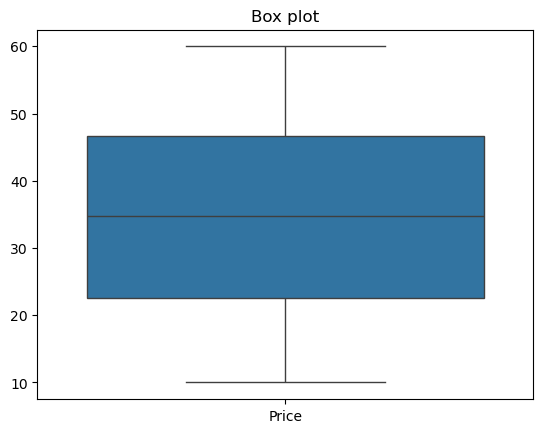

In [566]:
sns.boxplot(data = df[['Price']])
plt.title("Box plot")
plt.show()

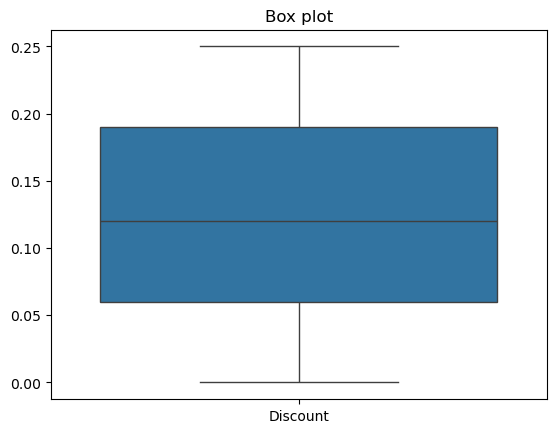

In [567]:
sns.boxplot(data = df[['Discount']])
plt.title("Box plot")
plt.show()

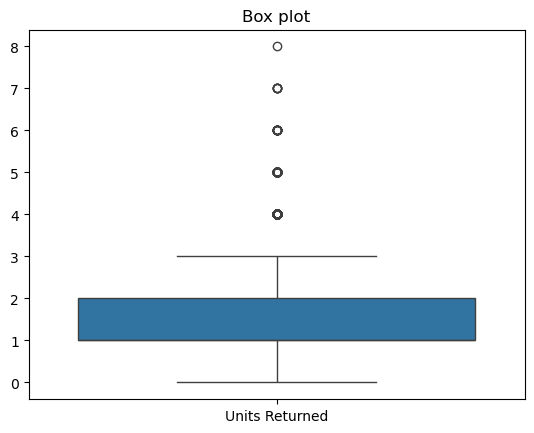

4,5,6,7,8 are outliers in Units Returned column


In [586]:
sns.boxplot(data = df[['Units Returned']])
plt.title("Box plot")
plt.show()

print("4,5,6,7,8 are outliers in Units Returned column")

In [569]:
df["Units Returned"].value_counts()

Units Returned
1    1403
2    1120
0     986
3     561
4     214
5      75
6      19
7       5
8       1
Name: count, dtype: int64

In [ ]:
df = df[~df["Units Returned"].isin([7, 8,5,6,4])]


IQR-based detection
(is a common technique for detecting outliers in numerical data using the Interquartile Range)

In [ ]:
# for y in ['Price','Discount','Units Returned']:
#     feature=pd.DataFrame(df[y])
#     Q1=feature.quantile(0.25)
#     Q3=feature.quantile(0.75)
#     IQ_range=Q3-Q1
#     lower_limit = Q1-1.5*IQ_range
#     upper_limit = Q3+1.5*IQ_range



#     outliers =[]
#     for i in range(0,len(feature)):
#         ft = feature.iloc[i, 0]
#         if(ft>upper_limit[0] or ft<lower_limit[0]):
#             outliers.append(ft)
#         else:
#             continue   
#     print(y)     
#     if(len(outliers)==0):
#         print("No outlier found")
#     else:
#         print(outliers)        
                    

Price
No outlier found
Discount
No outlier found
Units Returned
[np.int64(5), np.int64(5), np.int64(4), np.int64(4), np.int64(5), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(6), np.int64(6), np.int64(4), np.int64(7), np.int64(4), np.int64(5), np.int64(4), np.int64(5), np.int64(4), np.int64(4), np.int64(5), np.int64(4), np.int64(4), np.int64(4), np.int64(6), np.int64(4), np.int64(4), np.int64(5), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(6), np.int64(4), np.int64(5), np.int64(4), np.int64(4), np.int64(5), np.int64(4), np.int64(5), np.int64(4), np.int64(5), np.int64(5), np.int64(5), np.int64(4), np.int64(5), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(7), np.int64(4), np.int64(4), np.int64(5), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(4),

In [573]:
df.drop(["Category"],axis=1,inplace=True)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['First_week_day'] = df['Date'].dt.day
df.drop(["Date"],axis=1,inplace=True)


In [574]:
le = LabelEncoder()
for i in ["Location","Platform"]:
    df[i]=le.fit_transform(df[i])


In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = encoder.fit_transform(df[[

    Both Units Sold and Revenue are results of the sale, not known beforehand.

    Including them would mean your model is "cheating" — using future information that wouldn’t be available when making a real forecast.
]])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Product Name']))
df = pd.concat([df, encoded_df], axis=1)
df.drop(["Product Name"],axis=1,inplace=True)



In [576]:
df.drop(["Units Sold"],axis=1,inplace=True)


In [577]:
df.dropna(inplace=True)

X = df.drop(columns="Revenue")
y=df["Revenue"]

X

,Price,Discount,Units Returned,Location,Platform,Year,Month,First_week_day,Product Name_Ashwagandha,Product Name_BCAA,...,Product Name_Fish Oil,Product Name_Green Tea Extract,Product Name_Iron Supplement,Product Name_Magnesium,Product Name_Melatonin,Product Name_Multivitamin,Product Name_Pre-Workout,Product Name_Vitamin C,Product Name_Whey Protein,Product Name_Zinc
0,31.98,0.03,2,0,1,2020,1,6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,42.51,0.04,0,1,0,2020,1,6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,12.91,0.25,0,0,0,2020,1,6,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16.07,0.08,0,0,1,2020,1,6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,35.47,0.25,3,0,2,2020,1,6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4379,47.79,0.21,1,2,2,2025,3,31,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4380,38.12,0.22,1,1,1,2025,3,31,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4381,20.40,0.12,3,2,2,2025,3,31,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4382,18.31,0.23,2,0,0,2025,3,31,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [578]:

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Price                            4384 non-null   float64
 1   Discount                         4384 non-null   float64
 2   Units Returned                   4384 non-null   int64  
 3   Location                         4384 non-null   int64  
 4   Platform                         4384 non-null   int64  
 5   Year                             4384 non-null   int32  
 6   Month                            4384 non-null   int32  
 7   First_week_day                   4384 non-null   int32  
 8   Product Name_Ashwagandha         4384 non-null   float64
 9   Product Name_BCAA                4384 non-null   float64
 10  Product Name_Biotin              4384 non-null   float64
 11  Product Name_Collagen Peptides   4384 non-null   float64
 12  Product Name_Creatin

In [579]:
X.dropna(inplace=True)

In [580]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [581]:
scaler=StandardScaler()
scaler.fit_transform(X_train, X_test)

array([[ 0.95300093, -0.19828309, -0.4170243 , ..., -0.25745202,
        -0.25933573,  3.82834821],
       [ 1.7229169 ,  0.49862892, -0.4170243 , ..., -0.25745202,
        -0.25933573, -0.26120926],
       [-1.04104626, -1.45272473,  0.37181293, ..., -0.25745202,
        -0.25933573, -0.26120926],
       ...,
       [-0.45675387,  0.63801133,  0.37181293, ..., -0.25745202,
        -0.25933573, -0.26120926],
       [-1.54377678,  0.08048171, -1.20586153, ..., -0.25745202,
        -0.25933573, -0.26120926],
       [ 1.30104514,  1.33492335, -0.4170243 , ..., -0.25745202,
        -0.25933573, -0.26120926]], shape=(3507, 24))

In [582]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 217385.80497284766
R-squared (R²): 0.9529395521387245


In [583]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 429410.55255313567
R-squared (R²): 0.9070396849415607
